In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf

df = pd.read_csv("southafricanheart.csv")
df=df.drop(['Unnamed: 0'],axis=1)
df= df.dropna()
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


sklearn.metrics confusion_matrix de sklearn.metrics
PolynomialFeatures de sklearn.preprocessing

/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='famhist', ylabel='count'>

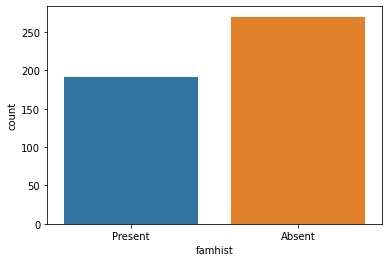

In [2]:
sns.countplot(df['famhist'])


/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chd', ylabel='count'>

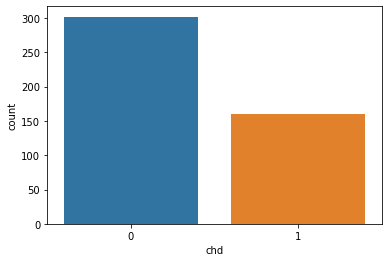

In [3]:
sns.countplot(df['chd'])

In [4]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


# Desafio 2

In [5]:
df['fanhistre']=np.where(df['famhist']=='Present',1,0)
df


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,fanhistre
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1
...,...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1,0
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0,0


In [6]:
def inverse_logit(df,x,y):
    m1_logit = smf.logit(y+ '~' + x, df).fit()
    mean_x=df[x].mean()
    estimate_y=m1_logit.params['Intercept'] + (m1_logit.params[x] * mean_x)
    return  1 / (1+np.exp(-estimate_y))

In [7]:
print('Probabilidad promedio')
inverse_logit(df,'fanhistre','chd')

Probabilidad promedio
Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


0.3355524250930946

In [8]:
df['fanhistre'].mean()

0.4155844155844156

### ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?

La probabilidad promedio de tener una enfermedad coronaria cuando tenemos antecedentes de 0.4 enfermedades cardiacas es: 0.33

# Desafio 3

In [48]:
def concise_summary(mod, print_fit=True):
    fit = pd.DataFrame({'Statistics': mod.summary2().tables[0][2][2:],
    'Value': mod.summary2().tables[0][3][2:]})
    estimates = pd.DataFrame(mod.summary2().tables[1].loc[:, 'Coef.':
    'Std.Err.'])
    if print_fit is True:
        print("\nGoodness of Fit statistics\n", fit)
        print("\nPoint Estimates\n\n", estimates)
    return estimates['Std.Err.']

    
for i , x in enumerate(df):
    if x=='famhist' or x=='chd':
        break
    print(x)
    m1_logit = smf.logit('chd'+ '~' + x, df).fit()
    mean_x=df[x].mean()
    sum=0
    estimate_y=m1_logit.params['Intercept'] + (m1_logit.params[x] * mean_x)
    estimate_y95=m1_logit.params['Intercept']/concise_summary(m1_logit,False)[0] + (m1_logit.params[x] * mean_x)
    concise_summary(m1_logit)
    print("Estimate:",(1 / (1+np.exp(-estimate_y))))
    print("Estimate 95",(1 / (1+np.exp(-estimate_y95))))
    print("Promedio",df[x].mean())



sbp
Optimization terminated successfully.
         Current function value: 0.626972
         Iterations 5

Goodness of Fit statistics
         Statistics       Value
2             BIC:    591.5934
3  Log-Likelihood:     -289.66
4         LL-Null:     -298.05
5     LLR p-value:  4.1839e-05
6           Scale:      1.0000
7                             

Point Estimates

               Coef.  Std.Err.
Intercept -3.352716  0.687699
sbp        0.019509  0.004863
Estimate: 0.3420779262333202
Estimate 95 0.10187139375202389
Promedio 138.32683982683983
tobacco
Optimization terminated successfully.
         Current function value: 0.600268
         Iterations 5

Goodness of Fit statistics
         Statistics       Value
2             BIC:    566.9186
3  Log-Likelihood:     -277.32
4         LL-Null:     -298.05
5     LLR p-value:  1.2025e-10
6           Scale:      1.0000
7                             

Point Estimates

              Coef.  Std.Err.
Intercept -1.18943  0.138995
tobacco    0.1452

La probabilidad promedio de tener una enfermedad coronaria cuando tenemos presion sanguinea sistolica de 138.326 es: 0.342 y con 95% de significancia 0.1018

La probabilidad promedio de tener una enfermedad coronaria cuando tenemos tobaco de 3.635649350649348 es: 0.342 y con 95% de significancia 0.1018

La probabilidad promedio de tener una enfermedad coronaria cuando tenemos ldl de 4.7403246753246835 es: 0.339239626390414 y con 95% de significancia 0.0027125174006134593

La probabilidad promedio de tener una enfermedad coronaria cuando tenemos adiposity de 25.40673160173159 es: 0.33480535998458427 y con 95% de significancia 0.00854286603670655

# Desafio 4

In [52]:
    m1_logit = smf.logit('chd'+ '~' + 'ldl', df).fit()
    mean_x=df['ldl'].mean()
    sum=0
    estimate_y=m1_logit.params['Intercept'] + (m1_logit.params['ldl'] * mean_x)
    concise_summary(m1_logit)
    print("Estimate:",(1 / (1+np.exp(-estimate_y))))
    print("Promedio",df['ldl'].mean())

Optimization terminated successfully.
         Current function value: 0.610691
         Iterations 5

Goodness of Fit statistics
         Statistics       Value
2             BIC:    576.5500
3  Log-Likelihood:     -282.14
4         LL-Null:     -298.05
5     LLR p-value:  1.6831e-08
6           Scale:      1.0000
7                             

Point Estimates

               Coef.  Std.Err.
Intercept -1.968668  0.273079
ldl        0.274661  0.051640
Estimate: 0.339239626390414
Promedio 4.7403246753246835


In [54]:
m1_logit = smf.logit('chd'+ '~' + 'ldl', df).fit()
mean_x=df['ldl'].mean()
sum=0
estimate_y=m1_logit.params['Intercept'] + (m1_logit.params['ldl'] * mean_x)
concise_summary(m1_logit)
print("Estimate:",(1 / (1+np.exp(-estimate_y))))
print("Promedio",df['ldl'].mean())

Optimization terminated successfully.
         Current function value: 0.610691
         Iterations 5
3.7403246753246835

Goodness of Fit statistics
         Statistics       Value
2             BIC:    576.5500
3  Log-Likelihood:     -282.14
4         LL-Null:     -298.05
5     LLR p-value:  1.6831e-08
6           Scale:      1.0000
7                             

Point Estimates

               Coef.  Std.Err.
Intercept -1.968668  0.273079
ldl        0.274661  0.051640
Estimate: 0.28062857732134067
Promedio 4.7403246753246835
